### This notebook aims to analys **previous_application.csv** which tell about the data related to  previous application of an applicant.


### Steps followed are :
>1. Becoming one with the data.

        i. null value handeling

        ii. datatype mismatch

        iii. dropping irrelevent rows and columns

        iv. Handling outliers
	
>2.  As requested an Univariate Analysis of features
	
>3.  Bivariate and Multivariate Analysis of features


In [1]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset

In [79]:
applications_data_df = pd.read_csv("/Users/anurag/Desktop/Appinventiv/cleaned_data/cleaned_application_data.csv")
previous_applications_df = pd.read_csv("/Users/anurag/Desktop/Appinventiv/dataset/previous_application.csv")

In [80]:
#Checking first 5 rows  of applications_data
applications_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5
2,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L,52.180822,50-55,0.616438,0-5
3,100006,0,Cash loans,F,Y,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1L-2L,3L-4L,2L-3L,52.068493,50-55,8.326027,5-10
4,100007,0,Cash loans,M,Y,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10


In [81]:
#checking first 5 rows of previous applications d
previous_applications_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Checking number of features and their datatype in both dataframe

In [82]:
# checking for total number of features along with their datatype
applications_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [83]:
previous_applications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [84]:
print(applications_data_df.shape)

print(previous_applications_df.shape)

(307511, 53)
(1670214, 37)


**NOTE:**

Initial finding with respect to both dataframes provided are:

- previous_application_df has-- 37 features and 1670214 rows 

    - 15- are float64 

    - 6- are integer 

    - 16- are object type
 
 
- applications_data_df has --  121 features, 1 target variable, and 307511 rows

    - 65- are float64 type

    - 41- are integer type
    
    - 16- are object type
 

In [85]:
# Figuring out what are the matching columns and extra columns present in both the dataframes provided.
matching_features = []
extra_features = []

for col in applications_data_df.columns:
    if col not in previous_applications_df.columns:
        extra_features.append(col)
    else:
        matching_features.append(col)
        
print(f"The number of extra features is:{len(extra_features)}")
print(f"The number of matching features is:{len(matching_features)}")
print(f"The list of matching features are:{matching_features}")

The number of extra features is:45
The number of matching features is:8
The list of matching features are:['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


### Data Cleaning

In [86]:
# Function_name : missingdata_percentage
# Usage : Returns % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and % of missing values in those categories

def percentage_missingdata(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [87]:
# caluclating the percentage of missing data in previous_applications
missingdata_previous_applications = percentage_missingdata(previous_applications_df)

In [88]:
# Sorting the percentage of missing values in descending order
missingdata_previous_applications.sort_values('percentage', 
                             ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.636480
4,RATE_DOWN_PAYMENT,53.636480
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


**NOTE:** 
Total of 16 features in previous_applications_df have missing values.

**Suggesting**
- droping of columns that have >90% missing data. Such columns identified are:
  - RATE_INTEREST_PRIMARY
  - RATE_INTEREST_PRIVILEGED 

- Dropping of rows that have very less percentage of missing values(This will not effect the analysis). Such columns identified are:
  - AMT_CREDIT 
  - PRODUCT_COMBINATION 

In [89]:
# dropping columns
previous_applications_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], 
                              axis=1, 
                              inplace=True)
# dropping rows
previous_applications_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], 
                                inplace=True)

In [90]:
#Checking the remaining columns
previous_applications_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [91]:
previous_applications_df.shape

(1669867, 35)

In [92]:
# Extracting the numeric features from previous application data

numeric_features = []
for col in previous_applications_df.columns:
    if previous_applications_df[col].dtype == float or previous_applications_df[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [93]:
# creating dataframe including only numeric features
previous_numeric_df = pd.DataFrame()

for col in numeric_features:
    previous_numeric_df[col] = previous_applications_df[col]

In [94]:
previous_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1669867 non-null  int64  
 1   SK_ID_CURR                 1669867 non-null  int64  
 2   AMT_ANNUITY                1297978 non-null  float64
 3   AMT_APPLICATION            1669867 non-null  float64
 4   AMT_CREDIT                 1669867 non-null  float64
 5   AMT_DOWN_PAYMENT           774370 non-null   float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START    1669867 non-null  int64  
 8   NFLAG_LAST_APPL_IN_DAY     1669867 non-null  int64  
 9   RATE_DOWN_PAYMENT          774370 non-null   float64
 10  DAYS_DECISION              1669867 non-null  int64  
 11  SELLERPLACE_AREA           1669867 non-null  int64  
 12  CNT_PAYMENT                1297983 non-null  float64
 13  DAYS_FIRST_D

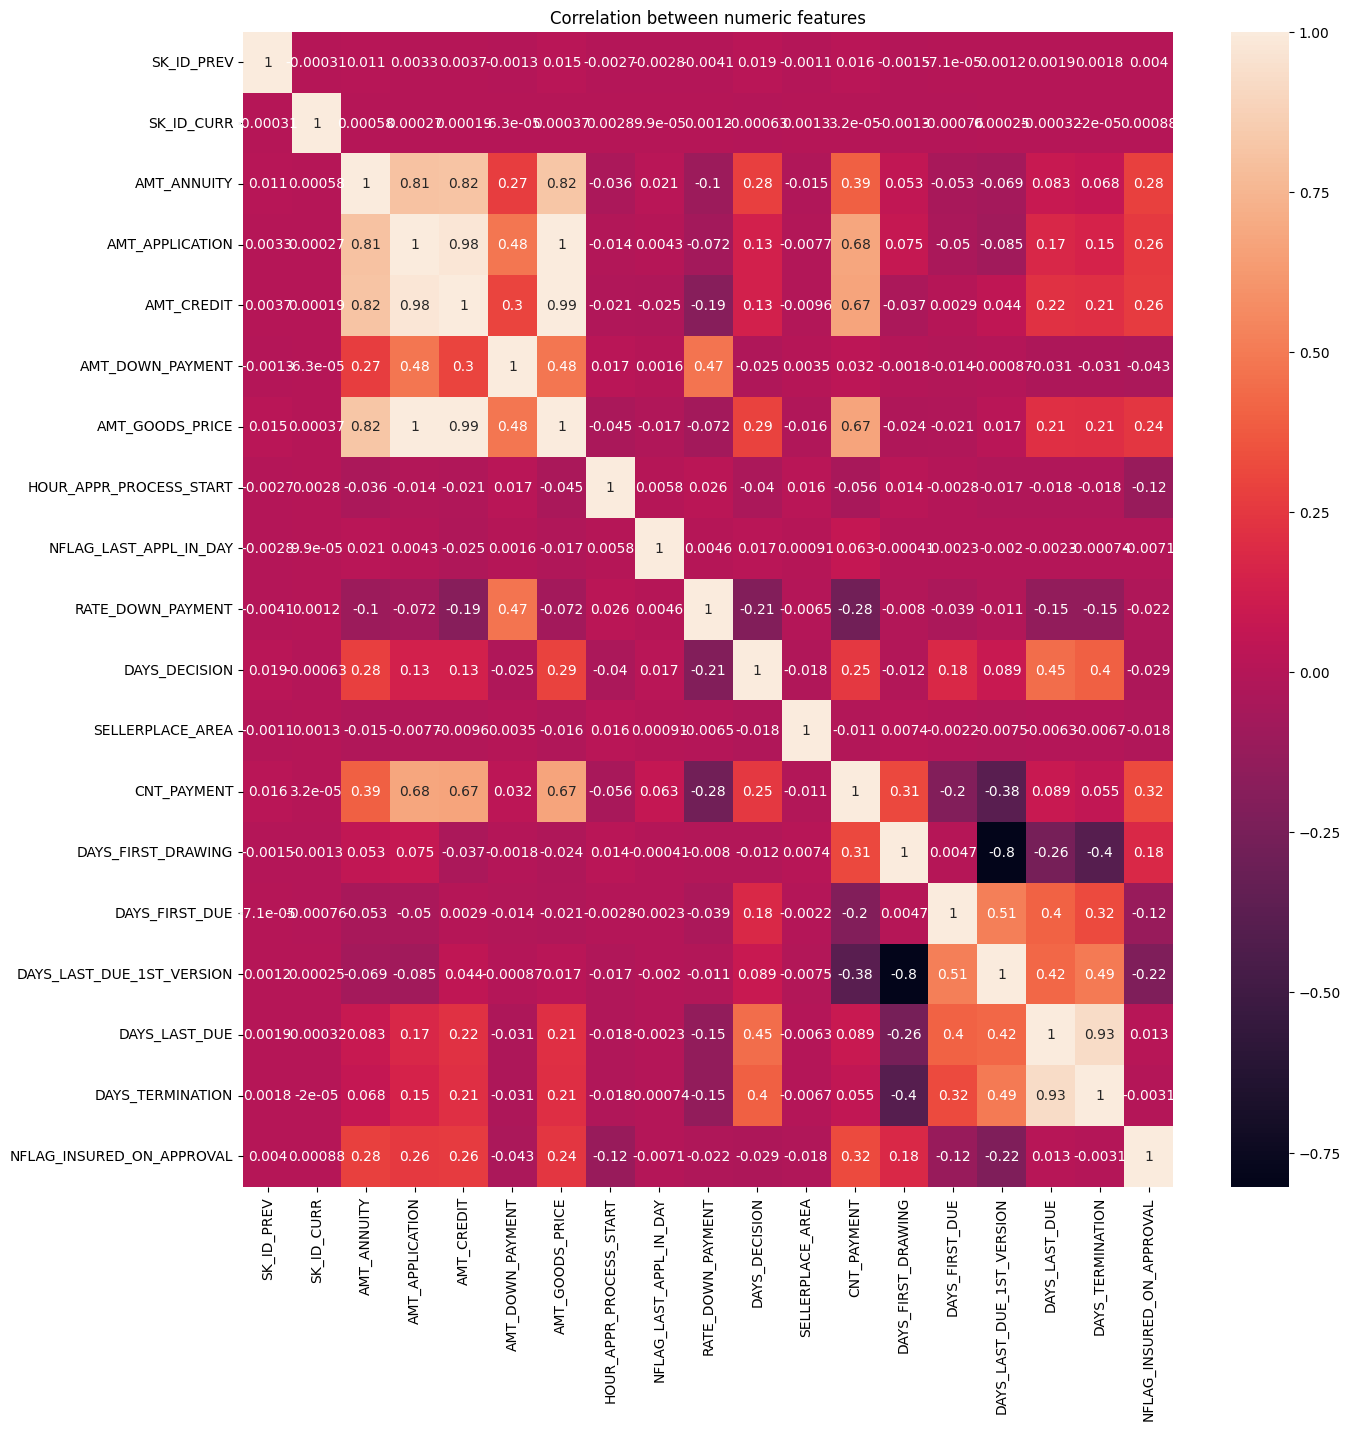

In [95]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(15,15))
sns.heatmap(previous_numeric_df.corr(), annot=True)
plt.title("Correlation between numeric features")
plt.show()

**OBSERVATION:**
- High levels of *negative* correlation is found between features 'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION'
- High levels of *positiv* correlation is found btween features 'DAYS_LAST_DUE' and 'DAYS_TERMINATION' 

- High correlation is found for features 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' 

The features can be removed before modelling this data, as they would cause collinearity **'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE'**
For EDA purpose we are not removing them.


In [96]:
previous_applications_df.drop(['SK_ID_PREV'], axis=1, inplace=True) # dropping SK_ID_PREV, not required

In [97]:
previous_applications_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

In [98]:
print(previous_applications_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [99]:
# Imputing values "Unknown" as this a categorical column

previous_applications_df['NAME_TYPE_SUITE'].fillna(previous_applications_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]
/Users/anurag/Desktop/Appinventiv/enve/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/Users/anurag/Desktop/Appin

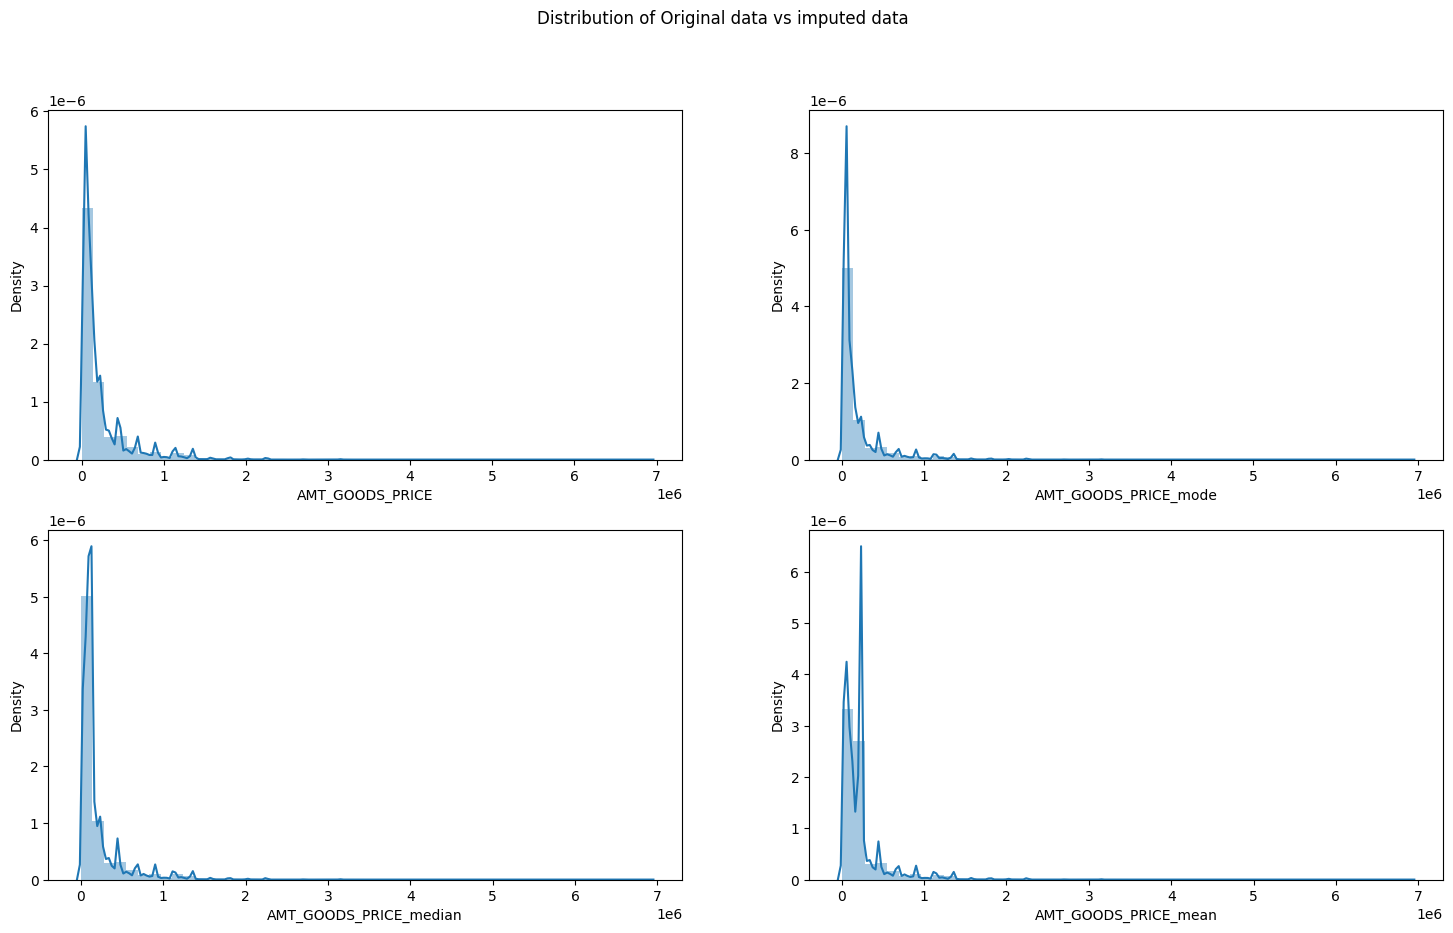

In [100]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = previous_applications_df['AMT_GOODS_PRICE'].fillna(previous_applications_df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previous_applications_df['AMT_GOODS_PRICE'].fillna(previous_applications_df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previous_applications_df['AMT_GOODS_PRICE'].fillna(previous_applications_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previous_applications_df['AMT_GOODS_PRICE'][pd.notnull(previous_applications_df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [101]:
# Imputing null values with mode

previous_applications_df['AMT_GOODS_PRICE'].fillna(previous_applications_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

Imputing Columns having null values ≤ 25% with Mode values for numeric columns except for continuous numeric columns we imputed with Median value

In [102]:

previous_applications_df.AMT_ANNUITY.fillna(previous_applications_df.AMT_ANNUITY.mode()[0],inplace = True)

previous_applications_df.CNT_PAYMENT.fillna(previous_applications_df.CNT_PAYMENT.mode()[0],inplace = True)

In [103]:
percentage_missingdata(previous_applications_df)

,category,percentage
0,AMT_DOWN_PAYMENT,53.626846
1,RATE_DOWN_PAYMENT,53.626846
2,DAYS_FIRST_DRAWING,40.285723
3,DAYS_FIRST_DUE,40.285723
4,DAYS_LAST_DUE_1ST_VERSION,40.285723
5,DAYS_LAST_DUE,40.285723
6,DAYS_TERMINATION,40.285723
7,NFLAG_INSURED_ON_APPROVAL,40.285723


In [104]:
# Merging only required columns of application_data with previous_application_data

merged_df = pd.merge(applications_data_df[['SK_ID_CURR', 'TARGET']], 
                     previous_applications_df, 
                     how='left', 
                     on=['SK_ID_CURR'])

In [105]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1413387 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1413387 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [106]:
# Checking on the numeric data in merged dataframe

merged_df.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.429841e+06,1.429841e+06,1.413387e+06,1.413387e+06,1.413387e+06,6.641610e+05,1.413387e+06,1.413387e+06,1.413387e+06,664161.000000,1.413387e+06,1.413387e+06,1.413387e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784721e+05,8.621658e-02,1.288685e+04,1.752825e+05,1.963976e+05,6.655317e+03,1.854708e+05,1.247888e+01,9.964313e-01,0.080175,-8.804742e+02,3.150476e+02,1.517212e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028026e+05,2.806837e-01,1.418182e+04,2.936432e+05,3.195033e+05,2.062030e+04,2.881488e+05,3.331533e+00,5.963220e-02,0.107784,7.835932e+02,7.695935e+03,1.299640e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893620e+05,0.000000e+00,2.469690e+03,1.975500e+04,2.491200e+04,0.000000e+00,4.500000e+04,1.000000e+01,1.000000e+00,0.000000,-1.314000e+03,-1.000000e+00,1.000000e+01,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789590e+05,0.000000e+00,8.254530e+03,7.090200e+04,8.064000e+04,1.791000e+03,7.091100e+04,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675110e+05,0.000000e+00,1.675138e+04,1.800000e+05,2.156400e+05,7.695000e+03,1.800000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,1.800000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Comment:** Not dropping the rest of columns with missing values, will use them  for further analysis.

Imputing Columns having null values ≤ 25% with Mode values for numeric columns except for continuous numeric columns we imputed with Median value

### Handling Outliers

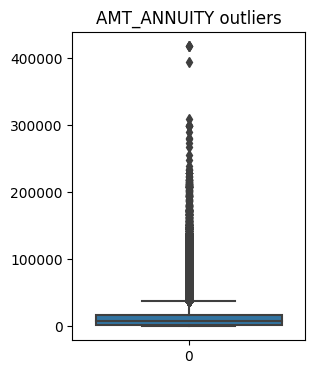

In [107]:
plt.figure(figsize=(3,4))
plt.title("AMT_ANNUITY outliers")
sns.boxplot(merged_df['AMT_ANNUITY'],)
plt.show()

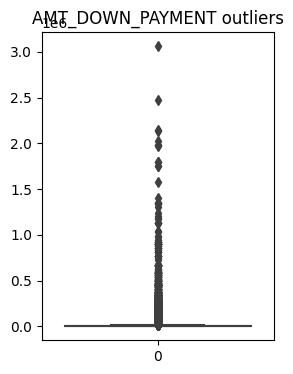

In [108]:
plt.figure(figsize=(3,4))
plt.title("AMT_DOWN_PAYMENT outliers")
sns.boxplot(merged_df['AMT_DOWN_PAYMENT'])
plt.show()

In [109]:
# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

merged_df = merged_df[merged_df['AMT_ANNUITY'] < np.nanpercentile(merged_df['AMT_ANNUITY'], 99)]
merged_df = merged_df[merged_df['AMT_DOWN_PAYMENT'] < np.nanpercentile(merged_df['AMT_DOWN_PAYMENT'], 99)]

Checking the features after updating.

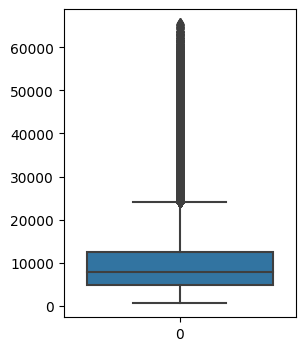

In [110]:
plt.figure(figsize=(3,4))
sns.boxplot(merged_df['AMT_ANNUITY'])
plt.show()

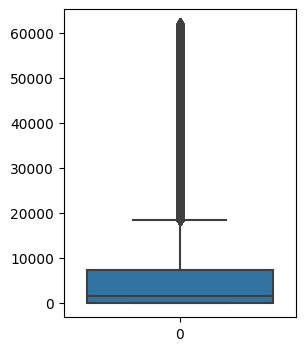

In [111]:
plt.figure(figsize=(3,4))
sns.boxplot(merged_df['AMT_DOWN_PAYMENT'])
plt.show()

### Checking Data Imbalance in Previous Application Data

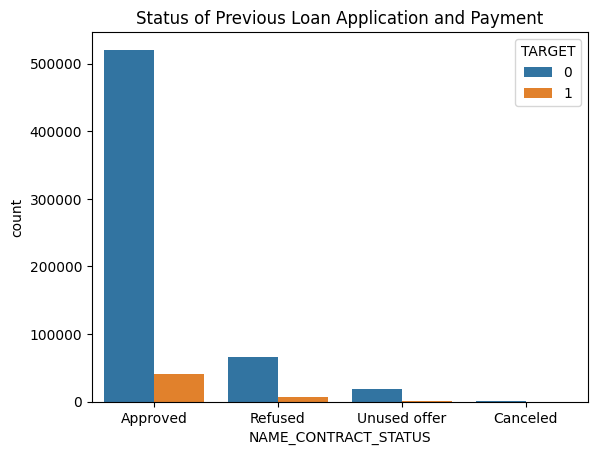

In [112]:
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(x= merged_df['NAME_CONTRACT_STATUS'], 
              hue=merged_df['TARGET'])
plt.show()

In [113]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = merged_df[(merged_df['TARGET'] == 1) & (merged_df['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.35473948960575


In [114]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = merged_df[(merged_df['TARGET'] == 0) & (merged_df['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.05992917461182


**Observation:**

- The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

- 7% of the previously approved loan applicants that defaulted in current loan

- 90 % of the previously refused loan applicants that were able to pay current loan

 

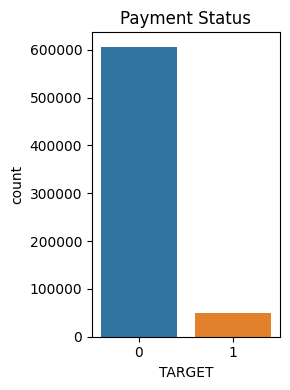

In [115]:
plt.figure(figsize=(3,4))
plt.title("Payment Status")
sns.countplot(x=merged_df['TARGET'])
plt.tight_layout()
plt.show()

**OBSERVATION:** 
- Very hight data imbalance is seen with respect to number of defaulters in the entire population data.



### Data Analysis: Univariate, Bivariate and Multivariate

In [116]:
print(merged_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts())

Y    656373
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


- All the entries of 'FLAG_LAST_APPL_PER_CONTRACT' feature are same. Thus dropping it is suggested.  

In [117]:
print(merged_df.NFLAG_LAST_APPL_IN_DAY.value_counts())

1.0    656135
0.0       238
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64



- Highly imbalance data is present for 'NFLAG_LAST_APPL_IN_DAY'. Thus dropping it is suggested.


## Analysis of Numeric Features of Previous Application Data

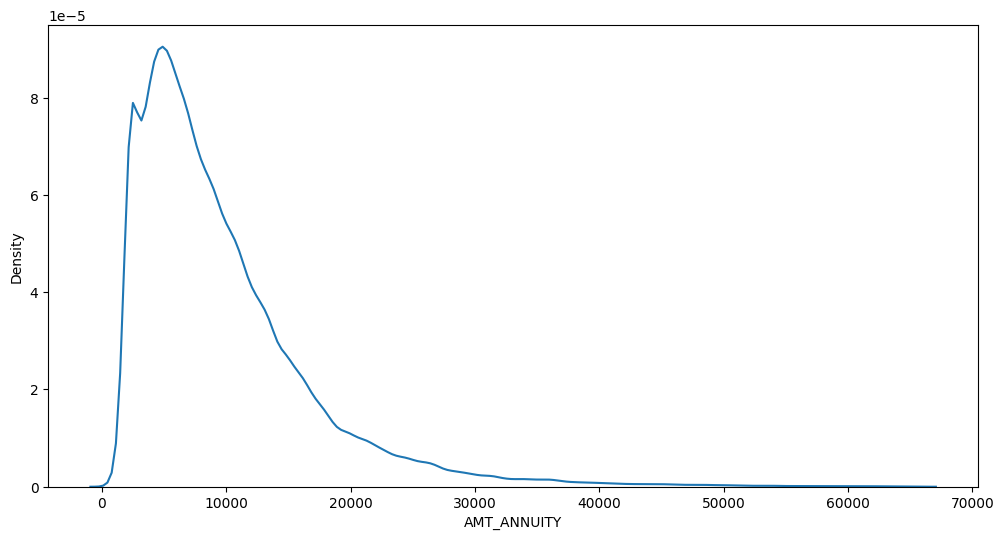

In [118]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(merged_df['AMT_ANNUITY'])
plt.show()

**Insight:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [119]:
merged_df['AMT_ANNUITY'].fillna(merged_df['AMT_ANNUITY'].median(),inplace = True)

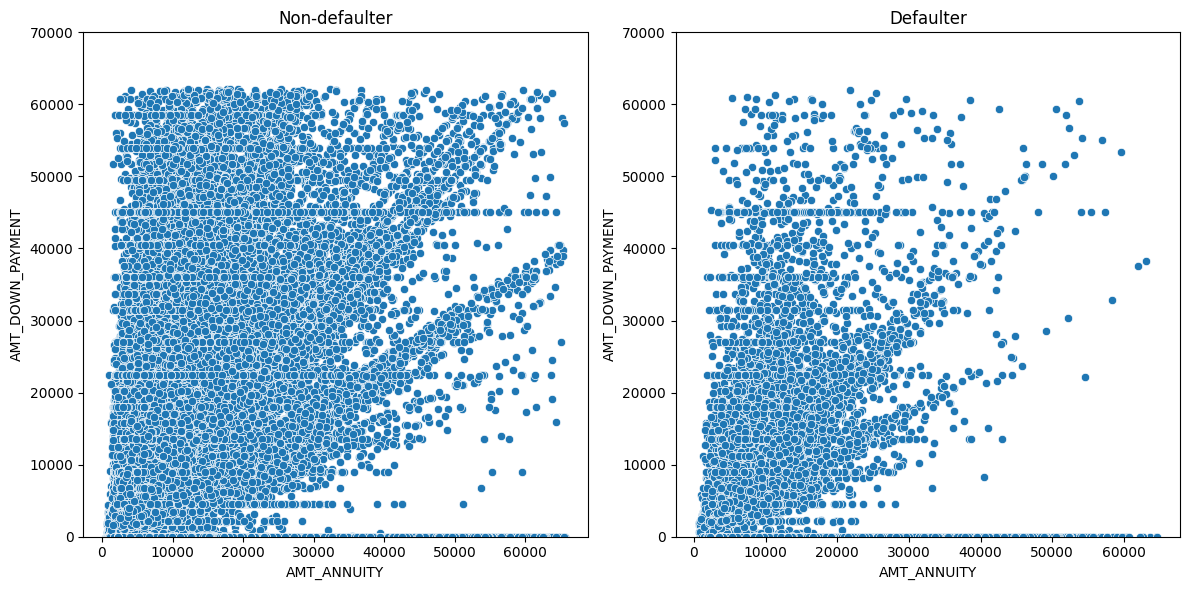

In [120]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(x=merged_df[merged_df["TARGET"] == 0]['AMT_ANNUITY'], 
                y=merged_df[merged_df["TARGET"] == 0]['AMT_DOWN_PAYMENT'], 
                ax=ax1)
sns.scatterplot(x=merged_df[merged_df["TARGET"] == 1]['AMT_ANNUITY'], 
                y=merged_df[merged_df["TARGET"] == 1]['AMT_DOWN_PAYMENT'], 
                ax=ax2)
plt.tight_layout()
plt.show()



**Comment:**
- Number of defaulters are less for larger amount of annuity of previous application.
- For higher down payment, defaulter cases are less.

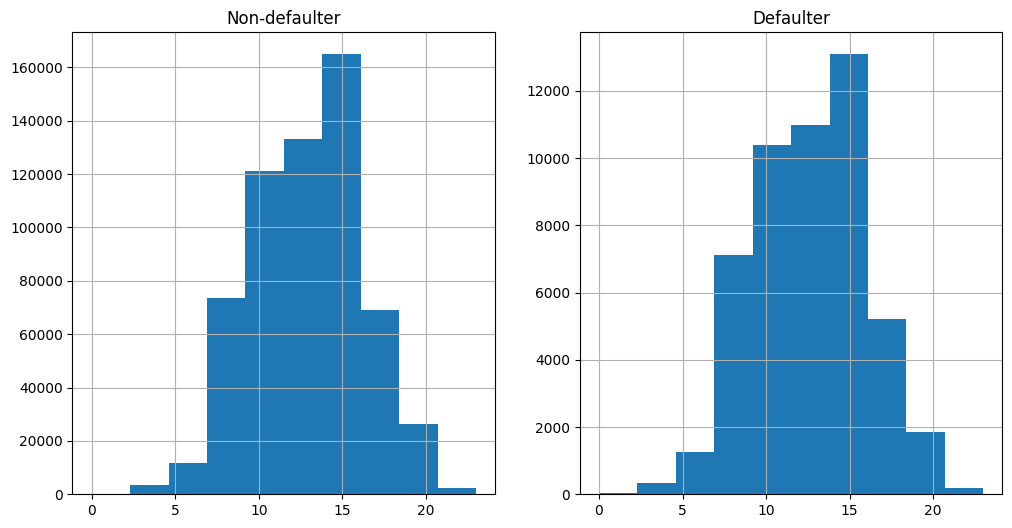

In [121]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

merged_df[merged_df["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
merged_df[merged_df["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

**Comment:**
- Most of the loans are applied around 15:00 hours. This feature is does not have visible impact on TARGET variable

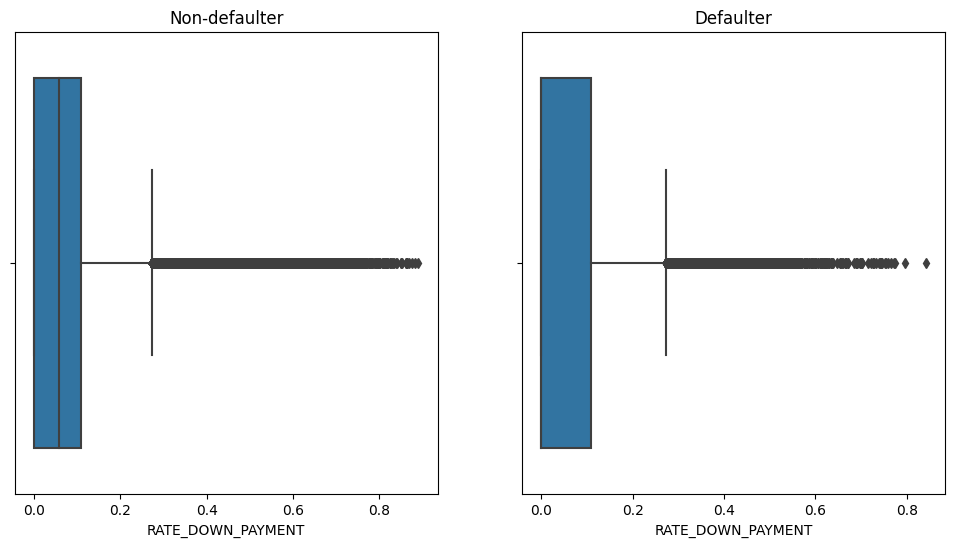

In [122]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.boxplot(x=merged_df[merged_df["TARGET"] == 0]['RATE_DOWN_PAYMENT'], ax=ax1)
sns.boxplot(x=merged_df[merged_df["TARGET"] == 1]['RATE_DOWN_PAYMENT'], ax=ax2)

plt.show()

Checking the quantile values for exact percentile

In [123]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

merged_df[merged_df["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.057935
0.70    0.107160
0.90    0.209555
0.95    0.272613
0.99    0.489096
Name: RATE_DOWN_PAYMENT, dtype: float64

In [124]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

merged_df[merged_df["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.000000
0.70    0.103377
0.90    0.193281
0.95    0.222581
0.99    0.442564
Name: RATE_DOWN_PAYMENT, dtype: float64

**Comment:**
- For those who had lower rate of down payment in previous application, cases of default are higher.

### Categorical Features Analysis

### 1. NAME_CONTRACT_TYPE 

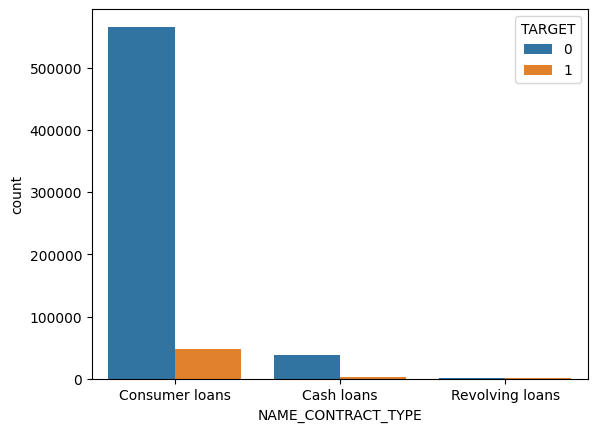

In [125]:
sns.countplot(x=merged_df.NAME_CONTRACT_TYPE, 
              hue=merged_df.TARGET)
plt.show()

In [126]:
value_wise_defaulter_percentage(merged_df,"NAME_CONTRACT_TYPE")

,Value,Percentage of Defaulter
2,Revolving loans,17.095238
0,Consumer loans,7.719734
1,Cash loans,6.577413


**Insights:**
- Applicants for Consumer Loans is the highest.

In [127]:
pd.set_option('display.max_columns', None)
merged_df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,0,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5.0,Y,1.0,0.212008,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
11,100006,0,Consumer loans,2482.920,26912.34,24219.0,2693.34,26912.34,TUESDAY,15.0,Y,1.0,0.108994,XAP,Approved,-617.0,XNA,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Stone,30.0,Construction,12.0,middle,POS industry with interest,365243.0,-545.0,-215.0,-425.0,-416.0,0.0
17,100007,0,Consumer loans,1834.290,17176.50,14616.0,3676.50,17176.50,SATURDAY,13.0,Y,1.0,0.218890,XAP,Approved,-2357.0,Cash through the bank,XAP,Family,New,Audio/Video,POS,XNA,Country-wide,1200.0,Consumer electronics,10.0,high,POS household with interest,365243.0,-2326.0,-2056.0,-2056.0,-2041.0,1.0
18,100007,0,Consumer loans,3601.530,31005.00,30663.0,3105.00,31005.00,SUNDAY,15.0,Y,1.0,0.100143,XAP,Approved,-1768.0,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Country-wide,53.0,Connectivity,12.0,high,POS mobile with interest,365243.0,-1736.0,-1406.0,-1406.0,-1397.0,0.0
20,100008,0,Consumer loans,17885.835,162598.50,162598.5,0.00,162598.50,THURSDAY,10.0,Y,1.0,0.000000,XAP,Approved,-370.0,Cash through the bank,XAP,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Country-wide,110.0,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0
22,100008,0,Consumer loans,8019.090,44455.50,39955.5,4500.00,44455.50,MONDAY,13.0,Y,1.0,0.110243,XAP,Approved,-2536.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Country-wide,50.0,Connectivity,6.0,low_normal,POS mobile with interest,365243.0,-2491.0,-2341.0,-2341.0,-2334.0,0.0
24,100008,0,Consumer loans,12144.285,121455.00,109309.5,12145.50,121455.00,MONDAY,9.0,Y,1.0,0.108909,XAP,Approved,-2333.0,Cash through the bank,XAP,Unaccompanied,Repeater,Gardening,POS,XNA,Regional / Local,96.0,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-2299.0,-2029.0,-2029.0,-703.0,0.0


### 2. NAME_CONTRACT_STATUS

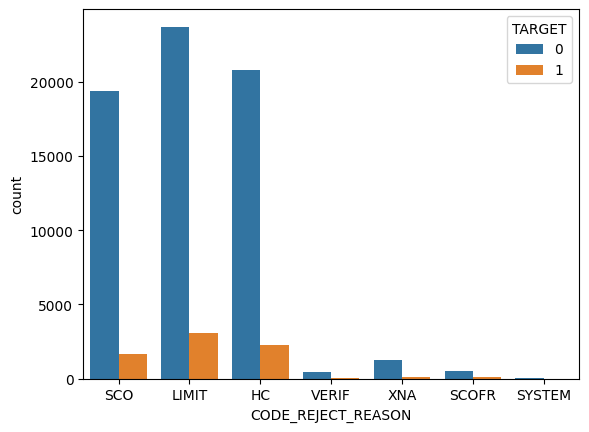

In [128]:
sns.countplot(x=merged_df[merged_df['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], 
              hue=merged_df.TARGET)
plt.show()

**Comment:**
- As seen in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection. 

### 3. NFLAG_INSURED_ON_APPROVAL

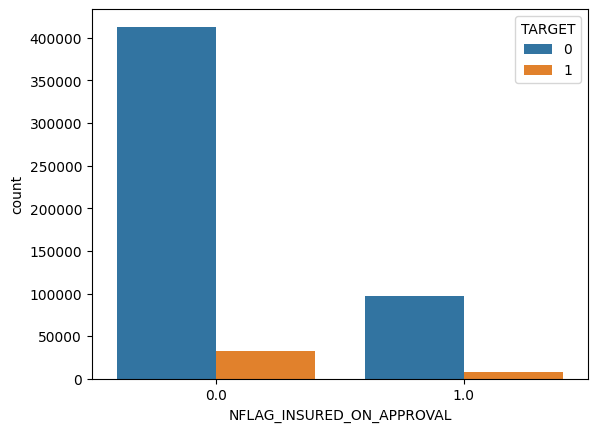

In [129]:
sns.countplot(x=merged_df['NFLAG_INSURED_ON_APPROVAL'], 
              hue=merged_df['TARGET'])
plt.show()

**Insight**
- Most of the people did not request insurance during previous loan application.

### 4. NAME_CLIENT_TYPE vs Target and NAME_PAYMENT_TYPE vs Target

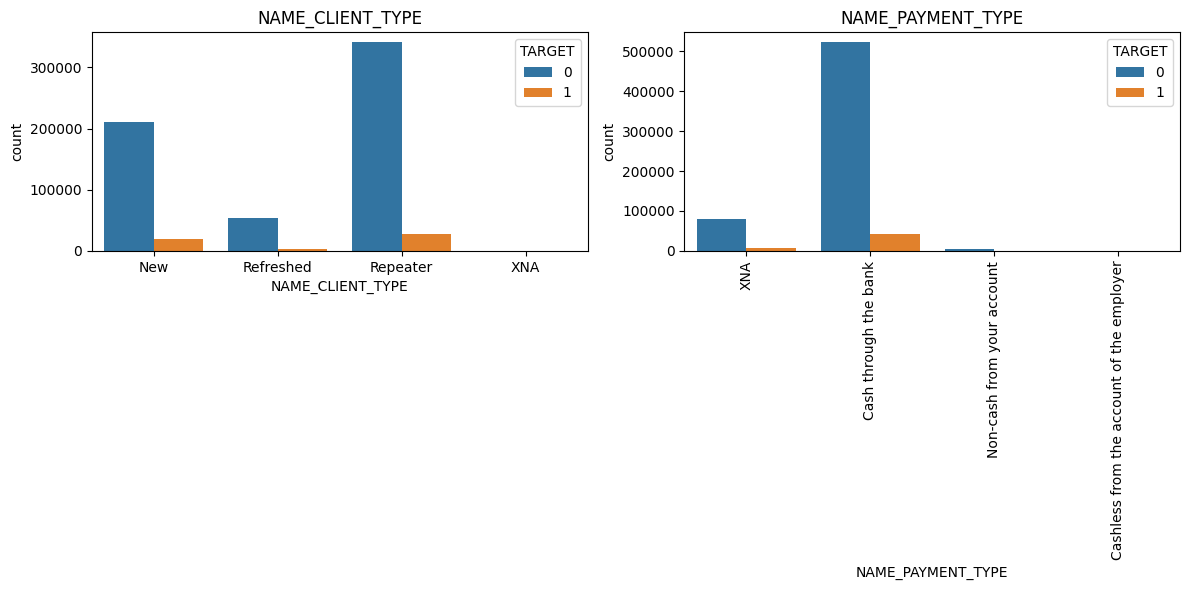

In [130]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(x=merged_df['NAME_CLIENT_TYPE'], 
              hue=merged_df['TARGET'], 
              ax=ax1)
sns.countplot(x=merged_df['NAME_PAYMENT_TYPE'], 
              hue=merged_df['TARGET'], 
              ax=ax2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights:**
- Maximum number of the applicants are of Repeater category.
- Maximum utilized method of payment is 'Cash through the bank' 

In [131]:
# This gives percentage of defaulter in total applicants having the same label of the category.
# For example: In 100 applicants, whose'NAME_GOODS_CATEGORY' is Insurance
# approx. 10 people have payment difficulty

def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

### 5. NAME_GOODS_CATEGORY

In [132]:
value_wise_defaulter_percentage(merged_df, 'NAME_GOODS_CATEGORY')

,Value,Percentage of Defaulter
23,Insurance,10.344828
0,Vehicles,10.246382
14,Jewelry,9.101655
17,Auto Accessories,9.077503
3,Mobile,8.646593
15,Office Appliances,8.261531
8,Computers,8.129473
20,Weapon,8.064516
21,Direct Sales,8.024691
5,Audio/Video,7.680187


**Insights:**
- Highest percentage of defaulters are seen for the applicants with insurance and Vechicles.

### 6. NAME_PORTFOLIO

In [133]:
value_wise_defaulter_percentage(merged_df, 'NAME_PORTFOLIO')

,Value,Percentage of Defaulter
3,Cards,17.127863
2,XNA,9.060192
0,POS,7.666247
1,Cash,6.383556
4,Cars,0.000000


**Insights:** 
Highest defaulter percentage is found for Cards

### 7. NAME_PRODUCT_TYPE

In [134]:
value_wise_defaulter_percentage(merged_df, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.164081
0,XNA,7.731311
2,x-sell,6.036814


**Insights:**
- In walk-in applicants from the total population, 9% were defaulter in current loan.

### 8. CHANNEL_TYPE

In [135]:
value_wise_defaulter_percentage(merged_df, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),15.000000
1,Country-wide,7.997470
2,Regional / Local,7.548551
0,Stone,7.299317
3,Credit and cash offices,6.122813
5,Contact center,4.545455
6,Car dealer,0.000000


**Insights:**
- 15% loan applicatiant defaulted for AP+ (Cash Loan)

### 9. NAME_SELLER_INDUSTRY

In [136]:
value_wise_defaulter_percentage(merged_df, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.526316
9,Jewelry,9.023669
3,Connectivity,8.846118
2,Consumer electronics,7.446944
7,Industry,7.199480
4,Construction,6.593315
5,XNA,6.228338
1,Furniture,5.919038
6,Clothing,5.891008
8,Tourism,4.844291


**ISIGHTS:**
- In seller Industry "Auto technology" has highest rate of defaulter
- MLM partners has lowest number of defaulters

### 10. NAME_YIELD_GROUP

In [137]:
value_wise_defaulter_percentage(merged_df, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
4,XNA,9.609142
2,high,8.340397
1,middle,7.557698
0,low_normal,6.844425
3,low_action,6.612092


**INSIGHTS:**
- Defaulter percentage is highest where NAME_YIELD_GROUP is not known.

### 11. PRODUCT_COMBINATION

In [138]:
value_wise_defaulter_percentage(merged_df, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
14,Cash,19.047619
13,Card Street,17.170264
4,POS mobile with interest,8.802499
0,POS other with interest,7.951005
3,POS mobile without interest,7.888514
2,POS household with interest,7.741691
11,POS others without interest,7.266603
16,Card X-Sell,6.666667
5,POS household without interest,6.649466
9,Cash Street: middle,6.466251


**INSIGHTS:** 
Highest percentage of default cases is for Card Street

**Conclusion**:
    
1. There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

2. Feature columns with 50% or more missing data can be dropped.

> Following columns should be converted to integer.
- DAYS_FIRST_DRAWING         float64
- DAYS_FIRST_DUE             float64
- DAYS_LAST_DUE_1ST_VERSION  float64
- DAYS_LAST_DUE              float64
- DAYS_TERMINATION           float64

- This categorical column has only 0 and 1 and hence can be converted into integer column.
- NFLAG_INSURED_ON_APPROVAL  float64

3. This dataset is highly imbalanced 

4. The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected. 
- **NAME_CONTRACT_STATUS** is an important feature.

- 7% of the previously approved loan applicants that defaulted in current loan
- 90 % of the previously refused loan applicants that were able to pay current loan

8. 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.

9. Most of the people did not request insurance during previous loan application.

10. For "Cards" defaulter percentage is highest (17%). 
- **'NAME_PORTFOLIO'** is an important feature for analyzing 'TARGET' variable.

11. 15% loan applicatiant defaulted for AP+ (Cash Loan). 
- **'CHANNEL_TYPE'** is an important feature for analyzing 'TARGET' variable.

12. Highest percentage (17%) of default cases is for 'Card Street'. 
- **'PRODUCT_COMBINATION'** is an important driving factor.